In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC
from sklearn.metrics import roc_curve, auc

In [7]:
import pandas as pd

# List of DOS files
dos_files = ['dos.csv', 'dos1.csv', 'dos2.csv', 'dos3.csv', 'dos4.csv', 
             'dos5.csv', 'dos6.csv', 'dos7.csv', 'dos8.csv']

# Specific destination ports to filter for
target_ports = [8008, 8009, 8443, 9000, 443]

# Read all files and filter for label=1 AND specific destination ports
filtered_data = []

for file in dos_files:
    try:
        # Read the CSV file
        df = pd.read_csv(file)
        
        # Filter rows where label equals 1 AND dst_port is in target_ports
        filtered_df = df[(df['Label'] == 1) & (df['dst_port'].isin(target_ports))]
        
        # Add to our list if we have data
        if len(filtered_df) > 0:
            filtered_data.append(filtered_df)
            print(f"Loaded {file}: {len(filtered_df)} rows with label=1 and target ports")
        else:
            print(f"No data found in {file} with label=1 and target ports")
        
    except FileNotFoundError:
        print(f"File {file} not found")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Combine all filtered data into one DataFrame
if filtered_data:
    combined_df = pd.concat(filtered_data, ignore_index=True)
    print(f"\nTotal rows with label=1 and target ports: {len(combined_df)}")
    
    # Analyze destination ports BEFORE sampling
    print("\n" + "="*50)
    print("ORIGINAL DESTINATION PORT ANALYSIS")
    print("="*50)
    
    dst_port_counts = combined_df['dst_port'].value_counts()
    print("Original distribution:")
    print(dst_port_counts)
    
    # === APPLY CUSTOM SAMPLING BY PORT ===
    print("\n" + "="*50)
    print("APPLYING CUSTOM SAMPLING")
    print("="*50)
    
    sampled_data = []
    
    for port in combined_df['dst_port'].unique():
        port_data = combined_df[combined_df['dst_port'] == port]
        original_count = len(port_data)
        
        if port == 9000:
            # Take 40% of port 9000 data
            sample_fraction = 0.3
            sampled_port_data = port_data.sample(frac=sample_fraction, random_state=42)
            print(f"Port {port}: {original_count} → {len(sampled_port_data)} rows (40%)")
            
        elif port == 8443:
            # Take 20% of port 8443 data
            sample_fraction = 0.2
            sampled_port_data = port_data.sample(frac=sample_fraction, random_state=42)
            print(f"Port {port}: {original_count} → {len(sampled_port_data)} rows (20%)")
        elif port == 8008:
            # Take 20% of port 8008 data
            sample_fraction = 0.3
            sampled_port_data = port_data.sample(frac=sample_fraction, random_state=42)
            print(f"Port {port}: {original_count} → {len(sampled_port_data)} rows (20%)")
            
        else:
            # Keep all data for other ports (8008, 8009, 443)
            sampled_port_data = port_data
            print(f"Port {port}: {original_count} → {len(sampled_port_data)} rows (100%)")
        
        sampled_data.append(sampled_port_data)
    
    # Combine sampled data
    combined_df = pd.concat(sampled_data, ignore_index=True)
    
    # Analyze destination ports AFTER sampling
    print("\n" + "="*50)
    print("FINAL DESTINATION PORT ANALYSIS")
    print("="*50)
    
    # Get unique destination ports
    unique_dst_ports = combined_df['dst_port'].unique()
    print(f"Number of unique destination ports: {len(unique_dst_ports)}")
    
    # Show all unique destination ports (sorted)
    print(f"\nUnique destination ports found:")
    print(sorted(unique_dst_ports))
    
    # Show distribution of target ports after sampling
    print(f"\nFinal port distribution:")
    dst_port_counts_final = combined_df['dst_port'].value_counts()
    print(dst_port_counts_final)
    
    # Show port statistics
    print(f"\nDestination port statistics:")
    print(f"Min port: {combined_df['dst_port'].min()}")
    print(f"Max port: {combined_df['dst_port'].max()}")
    print(f"Mean port: {combined_df['dst_port'].mean():.2f}")
    
    # Show percentage distribution of target ports
    print(f"\nFinal ports percentage distribution:")
    dst_port_percentages = combined_df['dst_port'].value_counts(normalize=True) * 100
    for port, percentage in dst_port_percentages.items():
        print(f"Port {port}: {percentage:.2f}%")
    
    # Summary of changes
    print(f"\n" + "="*50)
    print("SAMPLING SUMMARY")
    print("="*50)
    print(f"Total rows after sampling: {len(combined_df)}")
    
    # Show which target ports were found vs not found
    found_ports = set(unique_dst_ports)
    missing_ports = set(target_ports) - found_ports
    
    if missing_ports:
        print(f"Target ports NOT found in data: {sorted(missing_ports)}")
    else:
        print(f"All target ports found in data!")
        
else:
    print("No data found with the specified criteria")
    combined_df = pd.DataFrame()

# Store the filtered and sampled data for further use
df_data = combined_df

Loaded dos.csv: 15502 rows with label=1 and target ports
Loaded dos1.csv: 15520 rows with label=1 and target ports
Loaded dos2.csv: 4 rows with label=1 and target ports
Loaded dos3.csv: 4 rows with label=1 and target ports
Loaded dos4.csv: 1 rows with label=1 and target ports
Loaded dos5.csv: 501 rows with label=1 and target ports
Loaded dos6.csv: 2309 rows with label=1 and target ports
Loaded dos7.csv: 893 rows with label=1 and target ports
Loaded dos8.csv: 1947 rows with label=1 and target ports

Total rows with label=1 and target ports: 36681

ORIGINAL DESTINATION PORT ANALYSIS
Original distribution:
dst_port
8443    17414
8008    15995
9000     2308
8009      964
Name: count, dtype: int64

APPLYING CUSTOM SAMPLING
Port 8009: 964 → 964 rows (100%)
Port 8008: 15995 → 4798 rows (20%)
Port 8443: 17414 → 3483 rows (20%)
Port 9000: 2308 → 692 rows (40%)

FINAL DESTINATION PORT ANALYSIS
Number of unique destination ports: 4

Unique destination ports found:
[8008, 8009, 8443, 9000]

Final 

In [8]:
df_data.head()

,src_ip,dst_ip,src_port,dst_port,protocol,timestamp,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwr_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,Label
0,192.168.101.115,192.168.101.156,59274,8009,6,2025-07-03 10:46:52,0.033065,218055.345532,574.625737,332.678058,...,0.0,0.0,249.818182,557.75,0,11,8,2748,4462,1
1,192.168.101.115,192.168.101.156,59286,8009,6,2025-07-03 10:46:52,0.031996,225340.667583,593.824228,343.792974,...,0.0,0.0,249.818182,557.75,0,11,8,2748,4462,1
2,192.168.101.164,192.168.101.156,63489,8009,6,2025-07-03 10:46:53,0.027532,249818.393143,617.463315,326.892343,...,0.0,0.0,278.666667,546.25,0,9,8,2508,4370,1
3,192.168.101.164,192.168.101.156,63491,8009,6,2025-07-03 10:46:53,0.018583,370123.230910,914.814616,484.313620,...,0.0,0.0,278.666667,546.25,0,9,8,2508,4370,1
4,192.168.101.115,192.168.101.156,59300,8009,6,2025-07-03 10:46:54,0.027291,218277.087685,696.200213,403.063281,...,0.0,0.0,135.909091,557.75,0,11,8,1495,4462,1


In [9]:
# List of all session/output CSV files
session_files = ['output.csv', 'output1.csv', 'session3.csv', 'session5.csv', 'session7.csv', 
                 'session8.csv', 'session9.csv', 'session10.csv', 'session12.csv', 'session13.csv', 'session15.csv']

dfs_session = []

# Load all session files into a list
for file_name in session_files:
    try:
        df = pd.read_csv(file_name)
        dfs_session.append(df)
        print(f"Successfully loaded {file_name} with {len(df)} rows and {len(df.columns)} columns")
    except FileNotFoundError:
        print(f"❌ File {file_name} not found, skipping...")
    except Exception as e:
        print(f"❌ Error loading {file_name}: {e}")

# Concatenate all session DataFrames into a single DataFrame
df_session_data = pd.concat(dfs_session, axis=0, ignore_index=True)

print("\n" + "="*70 + "\n")
print("SESSION/OUTPUT FILES CONCATENATION RESULTS:")
print(f"Total files processed: {len(dfs_session)}")
print(f"Concatenated dataset shape: {df_session_data.shape}")
print(f"Total rows: {len(df_session_data)}")
print(f"Total columns: {len(df_session_data.columns)}")

Successfully loaded output.csv with 9605 rows and 83 columns
Successfully loaded output1.csv with 4611 rows and 83 columns
Successfully loaded session3.csv with 4611 rows and 83 columns
Successfully loaded session5.csv with 1066 rows and 83 columns
Successfully loaded session7.csv with 2686 rows and 83 columns
Successfully loaded session8.csv with 3754 rows and 83 columns
Successfully loaded session9.csv with 3808 rows and 83 columns
Successfully loaded session10.csv with 1892 rows and 83 columns
Successfully loaded session12.csv with 3150 rows and 83 columns
Successfully loaded session13.csv with 4690 rows and 83 columns
Successfully loaded session15.csv with 282 rows and 83 columns


SESSION/OUTPUT FILES CONCATENATION RESULTS:
Total files processed: 11
Concatenated dataset shape: (40155, 83)
Total rows: 40155
Total columns: 83


In [10]:
df_combined = pd.concat([df_data, df_session_data], axis=0, ignore_index=True)

In [11]:
# Concatenate both datasets
df_combined = pd.concat([df_data, df_session_data], axis=0, ignore_index=True)

print("="*70)
print("COMBINED DATASET RESULTS:")
print("="*70)

print(f"df_data (DOS files) shape: {df_data.shape}")
print(f"df_session_data (Session files) shape: {df_session_data.shape}")
print(f"Combined dataset shape: {df_combined.shape}")

print(f"\nTotal rows in combined dataset: {len(df_combined)}")
print(f"Total columns in combined dataset: {len(df_combined.columns)}")

print("\n" + "="*50 + "\n")

# Show label distribution
print("LABEL DISTRIBUTION:")
label_counts = df_combined['Label'].value_counts().sort_index()
print(label_counts)

print("\nLABEL PERCENTAGE DISTRIBUTION:")
label_percentages = df_combined['Label'].value_counts(normalize=True).sort_index() * 100
print(f"Label 0 (Normal/Benign): {label_percentages[0]:.2f}%")
print(f"Label 1 (Anomaly/Attack): {label_percentages[1]:.2f}%")

print("\n" + "="*50 + "\n")

print("DETAILED BREAKDOWN:")
print(f"Rows with Label 0 (Normal): {label_counts[0]:,}")
print(f"Rows with Label 1 (Anomaly): {label_counts[1]:,}")
print(f"Total rows: {label_counts.sum():,}")

print("\n" + "="*50 + "\n")

print("DATASET SOURCES:")
print(f"From DOS files (mostly anomalies): {len(df_data):,} rows")
print(f"From Session files (normal traffic): {len(df_session_data):,} rows")
print(f"Combined total: {len(df_combined):,} rows")

COMBINED DATASET RESULTS:
df_data (DOS files) shape: (9937, 83)
df_session_data (Session files) shape: (40155, 83)
Combined dataset shape: (50092, 83)

Total rows in combined dataset: 50092
Total columns in combined dataset: 83


LABEL DISTRIBUTION:
Label
0    40155
1     9937
Name: count, dtype: int64

LABEL PERCENTAGE DISTRIBUTION:
Label 0 (Normal/Benign): 80.16%
Label 1 (Anomaly/Attack): 19.84%


DETAILED BREAKDOWN:
Rows with Label 0 (Normal): 40,155
Rows with Label 1 (Anomaly): 9,937
Total rows: 50,092


DATASET SOURCES:
From DOS files (mostly anomalies): 9,937 rows
From Session files (normal traffic): 40,155 rows
Combined total: 50,092 rows


In [12]:
df= df_combined

In [13]:
df= df.drop(columns=['src_ip', 'dst_ip', 'timestamp'])

In [14]:
# Check for NaNs
nan_mask = df.isna()
print("NaNs in DataFrame:\n", df[nan_mask].sum())

# Check for infinities
inf_mask = df.isin([np.inf, -np.inf])
print("Infs in DataFrame:\n", df[inf_mask].sum())

NaNs in DataFrame:
 src_port            0.0
dst_port            0.0
protocol            0.0
flow_duration       0.0
flow_byts_s         0.0
                   ... 
subflow_fwd_pkts    0.0
subflow_bwd_pkts    0.0
subflow_fwd_byts    0.0
subflow_bwd_byts    0.0
Label               0.0
Length: 80, dtype: float64
Infs in DataFrame:
 src_port            0.0
dst_port            0.0
protocol            0.0
flow_duration       0.0
flow_byts_s         0.0
                   ... 
subflow_fwd_pkts    0.0
subflow_bwd_pkts    0.0
subflow_fwd_byts    0.0
subflow_bwd_byts    0.0
Label               0.0
Length: 80, dtype: float64


In [15]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
df.fillna(0, inplace=True)  # Replace NaNs with 0

In [16]:
df.isnull().sum()

src_port            0
dst_port            0
protocol            0
flow_duration       0
flow_byts_s         0
                   ..
subflow_fwd_pkts    0
subflow_bwd_pkts    0
subflow_fwd_byts    0
subflow_bwd_byts    0
Label               0
Length: 80, dtype: int64

In [17]:
df=df.astype(int)
df

,src_port,dst_port,protocol,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,...,fwd_blk_rate_avg,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,cwr_flag_count,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,Label
0,59274,8009,6,0,218055,574,332,241,11,8,...,0,0,249,557,0,11,8,2748,4462,1
1,59286,8009,6,0,225340,593,343,250,11,8,...,0,0,249,557,0,11,8,2748,4462,1
2,63489,8009,6,0,249818,617,326,290,9,8,...,0,0,278,546,0,9,8,2508,4370,1
3,63491,8009,6,0,370123,914,484,430,9,8,...,0,0,278,546,0,9,8,2508,4370,1
4,59300,8009,6,0,218277,696,403,293,11,8,...,0,0,135,557,0,11,8,1495,4462,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50087,50557,20002,17,0,0,0,0,0,2,0,...,0,0,415,0,0,2,0,830,0,0
50088,443,46848,17,6,563,4,2,1,17,11,...,0,0,140,104,0,17,11,2393,1151,0
50089,53139,443,17,0,16088,64,32,32,4,4,...,0,0,393,105,0,4,4,1575,423,0
50090,58071,443,17,4,158621,192,70,122,336,585,...,120045,3028042,86,1247,0,336,585,29165,729942,0


In [18]:
X = df.drop('Label',axis=1)
y = df['Label']

In [19]:
X, y

(       src_port  dst_port  protocol  flow_duration  flow_byts_s  flow_pkts_s  \
 0         59274      8009         6              0       218055          574   
 1         59286      8009         6              0       225340          593   
 2         63489      8009         6              0       249818          617   
 3         63491      8009         6              0       370123          914   
 4         59300      8009         6              0       218277          696   
 ...         ...       ...       ...            ...          ...          ...   
 50087     50557     20002        17              0            0            0   
 50088       443     46848        17              6          563            4   
 50089     53139       443        17              0        16088           64   
 50090     58071       443        17              4       158621          192   
 50091       443     50738         6              0            0            0   
 
        fwd_pkts_s  bwd_pk

In [20]:
# Impute missing values (replace NaNs with the mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Determine the number of columns (features) in your DataFrame
num_columns = df.shape[1]

# Set an appropriate value for k (less than or equal to the number of columns)
k = min(10, num_columns)  # Adjust this as needed

# Initialize SelectKBest with the scoring function
k_best = SelectKBest(score_func=f_classif, k=k)

# Fit and transform the imputed data to select the top 10 features
X_new = k_best.fit_transform(X_imputed, y)

c:\Users\G800613RTS\Desktop\Anomaly\anomaly\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [27 31 35 45 46 52 53 58 59 60 61 62 63 64 65 74] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\G800613RTS\Desktop\Anomaly\anomaly\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [21]:
# Get the boolean mask of selected features
selected_features_mask = k_best.get_support()
selected_features_mask 

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False])

In [22]:
elected_feature_names = X.columns[selected_features_mask]
elected_feature_names

Index(['src_port', 'protocol', 'fwd_pkt_len_max', 'fwd_pkt_len_mean',
       'pkt_len_mean', 'pkt_len_std', 'fwd_iat_tot', 'syn_flag_cnt',
       'pkt_size_avg', 'fwd_seg_size_avg'],
      dtype='object')

In [23]:
new_columns=['dst_port','src_port', 'protocol', 'fwd_pkt_len_max', 'fwd_pkt_len_mean',
       'fwd_pkt_len_std','fwd_iat_tot', 'pkt_len_mean', 'pkt_len_std', 'syn_flag_cnt',
       'pkt_size_avg', 'fwd_seg_size_avg']

In [24]:
df_new=X[new_columns]
df_new

,dst_port,src_port,protocol,fwd_pkt_len_max,fwd_pkt_len_mean,fwd_pkt_len_std,fwd_iat_tot,pkt_len_mean,pkt_len_std,syn_flag_cnt,pkt_size_avg,fwd_seg_size_avg
0,8009,59274,6,1842,249,504,0,379,577,3,379,249
1,8009,59286,6,1842,249,504,0,379,577,3,379,249
2,8009,63489,6,1798,278,538,0,404,595,3,404,278
3,8009,63491,6,1798,278,538,0,404,595,3,404,278
4,8009,59300,6,589,135,147,0,313,468,3,313,135
...,...,...,...,...,...,...,...,...,...,...,...,...
50087,20002,50557,17,415,415,0,0,415,0,0,415,415
50088,46848,443,17,278,140,77,6,126,66,0,126,140
50089,443,53139,17,706,393,312,0,249,266,0,249,393
50090,443,58071,17,191,86,21,4,824,587,0,824,86


In [25]:
df_new['label']=df['Label']
df_new['label']

C:\Users\G800613RTS\AppData\Local\Temp\ipykernel_14192\2155343533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label']=df['Label']


0        1
1        1
2        1
3        1
4        1
        ..
50087    0
50088    0
50089    0
50090    0
50091    0
Name: label, Length: 50092, dtype: int32

In [26]:
X1=df_new.iloc[:,:-1].values
y1=df_new.iloc[:,-1].values

In [27]:
X1, y1

(array([[ 8009, 59274,     6, ...,     3,   379,   249],
        [ 8009, 59286,     6, ...,     3,   379,   249],
        [ 8009, 63489,     6, ...,     3,   404,   278],
        ...,
        [  443, 53139,    17, ...,     0,   249,   393],
        [  443, 58071,    17, ...,     0,   824,    86],
        [50738,   443,     6, ...,     0,    72,    72]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

Logistic Regression

In [29]:
LR_model = LogisticRegression()

# Train the model
LR_model.fit(X_train, y_train)

c:\Users\G800613RTS\Desktop\Anomaly\anomaly\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
LR_y_pred = LR_model.predict(X_test)

In [31]:
# For ROC-AUC, you need predicted probabilities, not just class labels
LR_y_prob = LR_model.decision_function(X_test)  # Use decision_function for SVM or predict_proba for other models

In [32]:
LR_report = classification_report(y_test, LR_y_pred)
print("Classification Report:", LR_report)

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98     11979
           1       0.90      0.93      0.92      3049

    accuracy                           0.97     15028
   macro avg       0.94      0.95      0.95     15028
weighted avg       0.97      0.97      0.97     15028



In [33]:
LR_roc_auc = roc_auc_score(y_test, LR_y_prob)
print(f'ROC-AUC Score: {LR_roc_auc:.2f}')

ROC-AUC Score: 0.99


In [34]:
LR_conf_matrix = confusion_matrix(y_test, LR_y_pred)
df_conf_matrix = pd.DataFrame(LR_conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Logistic Regresion Confusion Matrix:")
print(df_conf_matrix)

Logistic Regresion Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               11674                 305
Actual Positive                 200                2849


Random Forest

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Train the model
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
# Predict class labels
rf_y_pred = rf_model.predict(X_test)

# Predict probabilities for ROC-AUC
rf_y_prob = rf_model.predict_proba(X_test)[:, 1]  # Assuming binary classification; for multiclass, adjust accordingly

In [37]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11979
           1       1.00      1.00      1.00      3049

    accuracy                           1.00     15028
   macro avg       1.00      1.00      1.00     15028
weighted avg       1.00      1.00      1.00     15028



In [38]:
# ROC-AUC Score
rf_roc_auc = roc_auc_score(y_test, rf_y_prob)
print(f'ROC-AUC Score: {rf_roc_auc:.2f}')

ROC-AUC Score: 1.00


In [39]:
# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
df_conf_matrix = pd.DataFrame(rf_conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Random Forest Confusion Matrix:")
print(df_conf_matrix)

Random Forest Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               11978                   1
Actual Positive                   5                3044


Deep Neural Network

🔧 Scaling the training and test data...
✅ Scaling completed!
Original X_train shape: (35064, 12)
Scaled X_train shape: (35064, 12)
Original X_test shape: (15028, 12)
Scaled X_test shape: (15028, 12)
🚀 Training Deep Neural Network with Early Stopping...
Model Architecture: 12 → 128 → 64 → 32 → 1
Epoch 1/50
877/877 [==============================] - 3s 2ms/step - loss: 0.0368 - accuracy: 0.9895 - auc: 0.9971 - val_loss: 0.0065 - val_accuracy: 0.9986 - val_auc: 0.9999
Epoch 2/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0129 - accuracy: 0.9971 - auc: 0.9988 - val_loss: 0.0218 - val_accuracy: 0.9906 - val_auc: 1.0000
Epoch 3/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0116 - accuracy: 0.9971 - auc: 0.9991 - val_loss: 0.0077 - val_accuracy: 0.9990 - val_auc: 1.0000
Epoch 4/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0106 - accuracy: 0.9973 - auc: 0.9995 - val_loss: 0.0179 - val_accuracy: 0.9954 - val_auc: 0.9994
Epoch 5/

C:\Users\G800613RTS\AppData\Local\Temp\ipykernel_14192\2467476838.py:153: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
c:\Users\G800613RTS\Desktop\Anomaly\anomaly\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


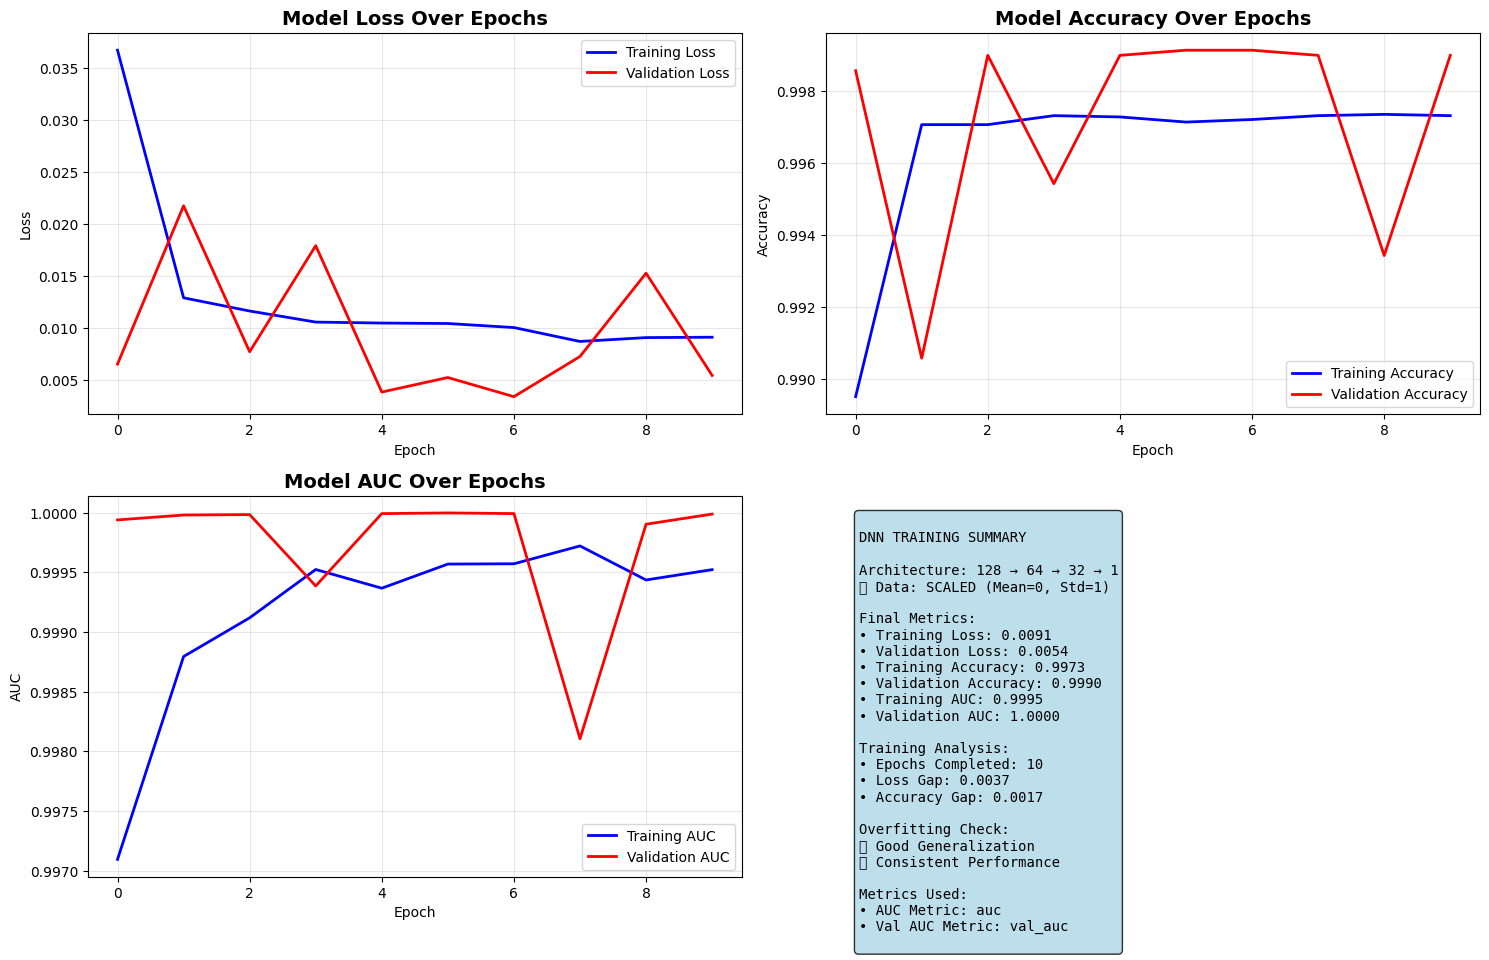


📊 DETAILED TRAINING ANALYSIS
Available metrics: ['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc']
Best Training Loss: 0.0087
Best Validation Loss: 0.0034
Best Training Accuracy: 0.9974
Best Validation Accuracy: 0.9991
Best Training AUC: 0.9997
Best Validation AUC: 1.0000

✅ Early stopping triggered at epoch 10
   → Model stopped before overfitting

🔮 Making predictions on test set...

🎯 DNN MODEL TEST RESULTS (WITH SCALING)
✅ Data preprocessing: StandardScaler applied
Test Accuracy: 0.9986 (99.86%)
Test Precision: 0.9990
Test Recall: 0.9941
Test F1-Score: 0.9965
Test ROC-AUC: 0.9999

📊 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     11979
     Anomaly       1.00      0.99      1.00      3049

    accuracy                           1.00     15028
   macro avg       1.00      1.00      1.00     15028
weighted avg       1.00      1.00      1.00     15028


DNN Confusion Matrix:
       

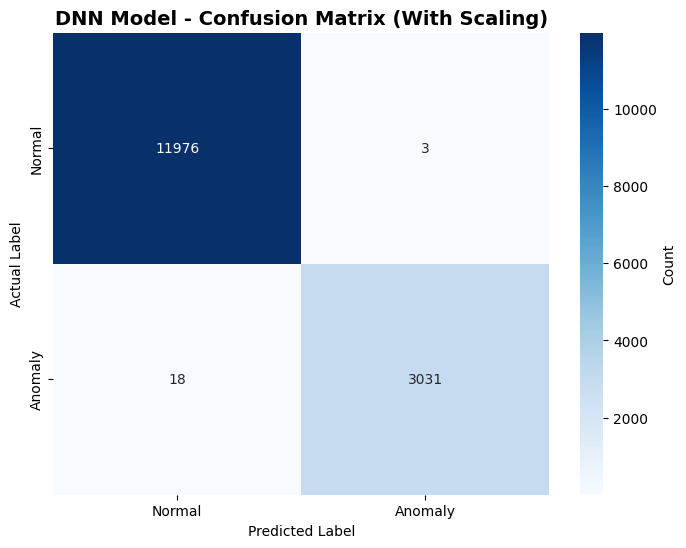


📈 SCALING STATISTICS
Training data mean: [-3.74963072e-16 -3.00568250e-16 -9.84702344e-16  1.31324464e-16
 -2.51383319e-16]...
Training data std: [1. 1. 1. 1. 1.]...
Test data mean: [ 0.00929082  0.01133426  0.00045488 -0.00985525 -0.00561843]...
Test data std: [1.00307126 0.9978891  0.99997464 0.84534838 0.984346  ]...


In [40]:
# Scale the data after train_test_split
from sklearn.preprocessing import StandardScaler

print("🔧 Scaling the training and test data...")
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Scaling completed!")
print(f"Original X_train shape: {X_train.shape}")
print(f"Scaled X_train shape: {X_train_scaled.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Scaled X_test shape: {X_test_scaled.shape}")

# Deep Neural Network with Early Stopping and Visualization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Build the DNN model
dnn_model = Sequential()
dnn_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=5,                # Stop if no improvement for 5 epochs
    restore_best_weights=True, # Restore the best weights
    verbose=1,                 # Print when stopping
    min_delta=0.001           # Minimum change to qualify as improvement
)

print("🚀 Training Deep Neural Network with Early Stopping...")
print(f"Model Architecture: {X_train_scaled.shape[1]} → 128 → 64 → 32 → 1")

# Train the model with SCALED data and early stopping
history = dnn_model.fit(
    X_train_scaled, y_train,      # ✅ Using scaled training data
    epochs=50,                    # More epochs (early stopping will control)
    batch_size=32,
    validation_split=0.2,         # 20% for validation
    callbacks=[early_stopping],   # Add early stopping
    verbose=1
)

print(f"\n✅ Training completed! Stopped at epoch {len(history.history['loss'])}")

# Plot training history - FIXED VERSION
def plot_training_history(history):
    """Plot training and validation metrics"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Training & Validation Loss
    axes[0,0].plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
    axes[0,0].plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
    axes[0,0].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Loss')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Training & Validation Accuracy
    axes[0,1].plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
    axes[0,1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
    axes[0,1].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Accuracy')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Training & Validation AUC - FIXED METRIC NAMES
    # Check which AUC metric name exists
    auc_key = None
    val_auc_key = None
    
    for key in history.history.keys():
        if 'auc' in key and not key.startswith('val_'):
            auc_key = key
        elif 'val_auc' in key:
            val_auc_key = key
    
    if auc_key and val_auc_key:
        axes[1,0].plot(history.history[auc_key], label='Training AUC', color='blue', linewidth=2)
        axes[1,0].plot(history.history[val_auc_key], label='Validation AUC', color='red', linewidth=2)
        axes[1,0].set_title('Model AUC Over Epochs', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Epoch')
        axes[1,0].set_ylabel('AUC')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
    else:
        # If AUC not found, show available metrics
        axes[1,0].text(0.5, 0.5, f'AUC metrics not found.\nAvailable metrics:\n{list(history.history.keys())}', 
                       ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('AUC Metrics Not Available')
    
    # 4. Training Summary
    axes[1,1].axis('off')
    
    # Calculate final metrics
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    
    # Get AUC values if available
    final_train_auc = history.history[auc_key][-1] if auc_key else 0.0
    final_val_auc = history.history[val_auc_key][-1] if val_auc_key else 0.0
    
    # Check for overfitting
    loss_gap = abs(final_train_loss - final_val_loss)
    acc_gap = abs(final_train_acc - final_val_acc)
    
    summary_text = f"""
DNN TRAINING SUMMARY

Architecture: 128 → 64 → 32 → 1
✅ Data: SCALED (Mean=0, Std=1)

Final Metrics:
• Training Loss: {final_train_loss:.4f}
• Validation Loss: {final_val_loss:.4f}
• Training Accuracy: {final_train_acc:.4f}
• Validation Accuracy: {final_val_acc:.4f}
• Training AUC: {final_train_auc:.4f}
• Validation AUC: {final_val_auc:.4f}

Training Analysis:
• Epochs Completed: {len(history.history['loss'])}
• Loss Gap: {loss_gap:.4f}
• Accuracy Gap: {acc_gap:.4f}

Overfitting Check:
{'✅ Good Generalization' if loss_gap < 0.1 else '⚠️ Possible Overfitting'}
{'✅ Consistent Performance' if acc_gap < 0.05 else '⚠️ Performance Gap'}

Metrics Used:
• AUC Metric: {auc_key if auc_key else 'Not found'}
• Val AUC Metric: {val_auc_key if val_auc_key else 'Not found'}
    """
    
    axes[1,1].text(0.05, 0.95, summary_text, fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
                   family='monospace')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print("\n" + "="*60)
    print("📊 DETAILED TRAINING ANALYSIS")
    print("="*60)
    print(f"Available metrics: {list(history.history.keys())}")
    
    print(f"Best Training Loss: {min(history.history['loss']):.4f}")
    print(f"Best Validation Loss: {min(history.history['val_loss']):.4f}")
    print(f"Best Training Accuracy: {max(history.history['accuracy']):.4f}")
    print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
    
    if auc_key and val_auc_key:
        print(f"Best Training AUC: {max(history.history[auc_key]):.4f}")
        print(f"Best Validation AUC: {max(history.history[val_auc_key]):.4f}")
    
    # Early stopping analysis
    if len(history.history['loss']) < 50:
        print(f"\n✅ Early stopping triggered at epoch {len(history.history['loss'])}")
        print("   → Model stopped before overfitting")
    else:
        print(f"\n⚠️ Model trained for full epochs")
        print("   → Monitor for potential overfitting")
    
    return final_val_loss, final_val_acc, final_val_auc

# Plot the training history
val_loss, val_acc, val_auc = plot_training_history(history)

# Make predictions on test set using SCALED data
print("\n🔮 Making predictions on test set...")
dnn_y_pred_prob = dnn_model.predict(X_test_scaled, verbose=0)  # ✅ Using scaled test data
dnn_y_pred = (dnn_y_pred_prob > 0.5).astype(int).flatten()

# Calculate test metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dnn_accuracy = accuracy_score(y_test, dnn_y_pred)
dnn_precision = precision_score(y_test, dnn_y_pred)
dnn_recall = recall_score(y_test, dnn_y_pred)
dnn_f1 = f1_score(y_test, dnn_y_pred)
dnn_roc_auc = roc_auc_score(y_test, dnn_y_pred_prob)

print("\n" + "="*60)
print("🎯 DNN MODEL TEST RESULTS (WITH SCALING)")
print("="*60)
print(f"✅ Data preprocessing: StandardScaler applied")
print(f"Test Accuracy: {dnn_accuracy:.4f} ({dnn_accuracy*100:.2f}%)")
print(f"Test Precision: {dnn_precision:.4f}")
print(f"Test Recall: {dnn_recall:.4f}")
print(f"Test F1-Score: {dnn_f1:.4f}")
print(f"Test ROC-AUC: {dnn_roc_auc:.4f}")

print("\n📊 DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, dnn_y_pred, target_names=['Normal', 'Anomaly']))

# Confusion Matrix for DNN
dnn_conf_matrix = confusion_matrix(y_test, dnn_y_pred)
df_dnn_conf_matrix = pd.DataFrame(dnn_conf_matrix, 
                                  index=['Actual Negative', 'Actual Positive'], 
                                  columns=['Predicted Negative', 'Predicted Positive'])
print("\nDNN Confusion Matrix:")
print(df_dnn_conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dnn_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'],
            cbar_kws={'label': 'Count'})
plt.title('DNN Model - Confusion Matrix (With Scaling)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Show scaling statistics
print("\n" + "="*60)
print("📈 SCALING STATISTICS")
print("="*60)
print(f"Training data mean: {X_train_scaled.mean(axis=0)[:5]}...")  # Show first 5 features
print(f"Training data std: {X_train_scaled.std(axis=0)[:5]}...")    # Show first 5 features
print(f"Test data mean: {X_test_scaled.mean(axis=0)[:5]}...")       # Show first 5 features
print(f"Test data std: {X_test_scaled.std(axis=0)[:5]}...")         # Show first 5 features

In [41]:
# Save the trained model and scaler for real-time testing
import pickle

print("💾 Saving trained model and scaler...")

# Save the DNN model
dnn_model.save('best_dnn_model_final.h5')
print("✅ DNN model saved as 'best_dnn_model_final.h5'")

# Save the scaler
with open('best_scaler_final.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Scaler saved as 'best_scaler_final.pkl'")

print("\n📋 Model Information for Real-time Testing:")
print(f"Model expects {X_train_scaled.shape[1]} features in this order:")
print(f"Features: {new_columns}")
print(f"Scaling: StandardScaler (mean=0, std=1)")
print(f"Prediction: >0.5 = Anomaly, <=0.5 = Normal")

💾 Saving trained model and scaler...
✅ DNN model saved as 'best_dnn_model_final.h5'
✅ Scaler saved as 'best_scaler_final.pkl'

📋 Model Information for Real-time Testing:
Model expects 12 features in this order:
Features: ['dst_port', 'src_port', 'protocol', 'fwd_pkt_len_max', 'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'fwd_iat_tot', 'pkt_len_mean', 'pkt_len_std', 'syn_flag_cnt', 'pkt_size_avg', 'fwd_seg_size_avg']
Scaling: StandardScaler (mean=0, std=1)
Prediction: >0.5 = Anomaly, <=0.5 = Normal


# Real-Time Data Testing

Testing the trained DNN model with real-time data from `real.csv`

In [42]:
# Load and preprocess real-time data
print("📂 Loading real-time data from 'real.csv'...")

try:
    # Load the real-time data
    df_real = pd.read_csv('dos6.csv')
    print(f"✅ Successfully loaded real.csv with {len(df_real)} rows and {len(df_real.columns)} columns")
    
    # Display basic info about the real-time data
    print(f"\nReal-time data shape: {df_real.shape}")
    print(f"Columns: {list(df_real.columns)}")
    
    # Show first few rows
    print("\nFirst 5 rows of real-time data:")
    print(df_real.head())
    
except FileNotFoundError:
    print("❌ Error: 'real.csv' file not found in the current directory")
    print("Please make sure the file exists and is in the correct location")
except Exception as e:
    print(f"❌ Error loading real.csv: {e}")

📂 Loading real-time data from 'real.csv'...
✅ Successfully loaded real.csv with 2413 rows and 83 columns

Real-time data shape: (2413, 83)
Columns: ['src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol', 'timestamp', 'flow_duration', 'flow_byts_s', 'flow_pkts_s', 'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean', 'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len', 'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean', 'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot', 'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std', 'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean', 'bwd_iat_std', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt

In [43]:
# Preprocess real-time data using the same pipeline as training data
print("🔧 Preprocessing real-time data...")

try:
    # Step 1: Remove columns that were dropped during training (if they exist)
    columns_to_drop = ['src_ip', 'dst_ip', 'timestamp','Label']
    for col in columns_to_drop:
        if col in df_real.columns:
            df_real = df_real.drop(columns=[col])
            print(f"✅ Dropped column: {col}")
    
    # Step 2: Handle NaN and infinite values
    print("🔧 Handling missing and infinite values...")
    df_real.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_real.fillna(0, inplace=True)
    
    # Step 3: Convert to integer (same as training data)
    print("🔧 Converting data types...")
    df_real = df_real.astype(int)
    
    # Step 4: Extract the same features used for training
    print("🔧 Extracting required features...")
    print(f"Required features: {new_columns}")
    
    # Check if all required columns exist
    missing_columns = []
    for col in new_columns:
        if col not in df_real.columns:
            missing_columns.append(col)
    
    if missing_columns:
        print(f"❌ Missing columns in real-time data: {missing_columns}")
        print(f"Available columns: {list(df_real.columns)}")
        raise ValueError(f"Missing required columns: {missing_columns}")
    
    # Extract only the required features
    X_real = df_real[new_columns]
    print(f"✅ Extracted features with shape: {X_real.shape}")
    
    print("\nReal-time data preprocessing completed!")
    print(f"Features extracted: {list(X_real.columns)}")
    print(f"Data shape: {X_real.shape}")
    print(f"Data types: {X_real.dtypes.unique()}")
    
    # Show first few rows of processed data
    print("\nFirst 5 rows of processed real-time data:")
    print(X_real.head())
    
except Exception as e:
    print(f"❌ Error during preprocessing: {e}")
    X_real = None

🔧 Preprocessing real-time data...
✅ Dropped column: src_ip
✅ Dropped column: dst_ip
✅ Dropped column: timestamp
✅ Dropped column: Label
🔧 Handling missing and infinite values...
🔧 Converting data types...
🔧 Extracting required features...
Required features: ['dst_port', 'src_port', 'protocol', 'fwd_pkt_len_max', 'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'fwd_iat_tot', 'pkt_len_mean', 'pkt_len_std', 'syn_flag_cnt', 'pkt_size_avg', 'fwd_seg_size_avg']
✅ Extracted features with shape: (2413, 12)

Real-time data preprocessing completed!
Features extracted: ['dst_port', 'src_port', 'protocol', 'fwd_pkt_len_max', 'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'fwd_iat_tot', 'pkt_len_mean', 'pkt_len_std', 'syn_flag_cnt', 'pkt_size_avg', 'fwd_seg_size_avg']
Data shape: (2413, 12)
Data types: [dtype('int32')]

First 5 rows of processed real-time data:
   dst_port  src_port  protocol  fwd_pkt_len_max  fwd_pkt_len_mean  \
0     53649      5555         6              172                73   
1       443     

In [44]:
# Scale real-time data and make predictions
if X_real is not None:
    try:
        print("🔧 Scaling real-time data using the same scaler...")
        
        # Scale the real-time data using the same scaler fitted on training data
        X_real_scaled = scaler.transform(X_real)
        print(f"✅ Real-time data scaled successfully!")
        print(f"Scaled data shape: {X_real_scaled.shape}")
        print(f"Scaled data mean: {X_real_scaled.mean(axis=0)[:5]}...")  # Show first 5 features
        print(f"Scaled data std: {X_real_scaled.std(axis=0)[:5]}...")    # Show first 5 features
        
        print("\n🔮 Making predictions on real-time data...")
        
        # Make predictions using the trained DNN model
        real_pred_prob = dnn_model.predict(X_real_scaled, verbose=0)
        real_pred_binary = (real_pred_prob > 0.5).astype(int).flatten()
        
        print(f"✅ Predictions completed for {len(real_pred_binary)} samples!")
        
        # Create results DataFrame
        results_df = pd.DataFrame({
            'Sample_ID': range(1, len(real_pred_binary) + 1),
            'Prediction_Probability': real_pred_prob.flatten(),
            'Prediction_Binary': real_pred_binary,
            'Prediction_Label': ['Anomaly' if pred == 1 else 'Normal' for pred in real_pred_binary]
        })
        
        # Add the original features for reference
        for i, col in enumerate(new_columns):
            results_df[f'Feature_{col}'] = X_real.iloc[:, i].values
        
        print("\n" + "="*70)
        print("🎯 REAL-TIME PREDICTION RESULTS")
        print("="*70)
        
        # Summary statistics
        num_normal = sum(real_pred_binary == 0)
        num_anomaly = sum(real_pred_binary == 1)
        avg_prob = real_pred_prob.mean()
        max_prob = real_pred_prob.max()
        min_prob = real_pred_prob.min()
        
        print(f"Total samples analyzed: {len(real_pred_binary)}")
        print(f"Normal traffic detected: {num_normal} ({num_normal/len(real_pred_binary)*100:.1f}%)")
        print(f"Anomalies detected: {num_anomaly} ({num_anomaly/len(real_pred_binary)*100:.1f}%)")
        print(f"Average prediction probability: {avg_prob:.4f}")
        print(f"Highest risk score: {max_prob:.4f}")
        print(f"Lowest risk score: {min_prob:.4f}")
        
        # Show first 10 predictions
        print(f"\nFirst 10 predictions:")
        print(results_df[['Sample_ID', 'Prediction_Probability', 'Prediction_Label']].head(10))
        
        # Show anomalies if any
        anomalies = results_df[results_df['Prediction_Binary'] == 1]
        if len(anomalies) > 0:
            print(f"\n🚨 DETECTED ANOMALIES (Top 10 by probability):")
            top_anomalies = anomalies.nlargest(10, 'Prediction_Probability')
            print(top_anomalies[['Sample_ID', 'Prediction_Probability', 'Prediction_Label']])
        else:
            print(f"\n✅ No anomalies detected in the real-time data!")
            
        print(f"\n💾 Results saved in 'results_df' variable for further analysis")
        
    except Exception as e:
        print(f"❌ Error during prediction: {e}")
        results_df = None
else:
    print("❌ Cannot make predictions: Real-time data preprocessing failed")

🔧 Scaling real-time data using the same scaler...
✅ Real-time data scaled successfully!
Scaled data shape: (2413, 12)
Scaled data mean: [-0.18592227  0.39546582 -0.97654562 -0.51280215 -0.76996578]...
Scaled data std: [0.13696477 0.4568594  0.39345612 0.17033882 0.29750278]...

🔮 Making predictions on real-time data...


c:\Users\G800613RTS\Desktop\Anomaly\anomaly\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


✅ Predictions completed for 2413 samples!

🎯 REAL-TIME PREDICTION RESULTS
Total samples analyzed: 2413
Normal traffic detected: 104 (4.3%)
Anomalies detected: 2309 (95.7%)
Average prediction probability: 0.9561
Highest risk score: 1.0000
Lowest risk score: 0.0000

First 10 predictions:
   Sample_ID  Prediction_Probability Prediction_Label
0          1            1.420047e-21           Normal
1          2            5.440776e-12           Normal
2          3            1.079755e-13           Normal
3          4            1.610220e-17           Normal
4          5            2.682917e-14           Normal
5          6            3.387308e-15           Normal
6          7            2.696407e-08           Normal
7          8            3.702302e-10           Normal
8          9            2.212639e-14           Normal
9         10            1.159557e-13           Normal

🚨 DETECTED ANOMALIES (Top 10 by probability):
      Sample_ID  Prediction_Probability Prediction_Label
303         304

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("real.csv")

# Print value counts for the 'Label' column
print("🔍 Number of samples by label (0 = Normal, 1 = Anomaly):")
print(df['Label'].value_counts())

🔍 Number of samples by label (0 = Normal, 1 = Anomaly):
Label
1    2309
0     104
Name: count, dtype: int64


In [ ]:
# Visualize real-time prediction results
if 'results_df' in locals() and results_df is not None:
    print("📊 Creating visualizations for real-time predictions...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Prediction Distribution (Pie Chart)
    prediction_counts = results_df['Prediction_Label'].value_counts()
    colors = ['lightgreen', 'lightcoral']
    axes[0,0].pie(prediction_counts.values, labels=prediction_counts.index, autopct='%1.1f%%', 
                  colors=colors, startangle=90)
    axes[0,0].set_title('Real-Time Prediction Distribution', fontsize=14, fontweight='bold')
    
    # 2. Prediction Probability Distribution
    axes[0,1].hist(results_df['Prediction_Probability'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,1].axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
    axes[0,1].set_title('Prediction Probability Distribution', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Prediction Probability')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Time Series of Predictions (if we have sequential data)
    sample_ids = results_df['Sample_ID'].values
    predictions = results_df['Prediction_Probability'].values
    colors_scatter = ['green' if pred == 0 else 'red' for pred in results_df['Prediction_Binary']]
    
    axes[1,0].scatter(sample_ids, predictions, c=colors_scatter, alpha=0.6, s=30)
    axes[1,0].axhline(y=0.5, color='black', linestyle='--', label='Decision Threshold')
    axes[1,0].set_title('Prediction Scores Over Samples', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Sample ID')
    axes[1,0].set_ylabel('Prediction Probability')
    axes[1,0].legend(['Normal', 'Anomaly', 'Threshold'])
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Summary Statistics
    axes[1,1].axis('off')
    
    # Calculate statistics
    total_samples = len(results_df)
    normal_count = sum(results_df['Prediction_Binary'] == 0)
    anomaly_count = sum(results_df['Prediction_Binary'] == 1)
    avg_prob = results_df['Prediction_Probability'].mean()
    std_prob = results_df['Prediction_Probability'].std()
    
    # High-risk samples (probability > 0.8)
    high_risk = sum(results_df['Prediction_Probability'] > 0.8)
    medium_risk = sum((results_df['Prediction_Probability'] > 0.5) & (results_df['Prediction_Probability'] <= 0.8))
    low_risk = sum(results_df['Prediction_Probability'] <= 0.5)
    
    summary_text = f"""
REAL-TIME ANALYSIS SUMMARY

Dataset Information:
• Total Samples: {total_samples:,}
• Model Used: DNN (128→64→32→1)
• Features: {len(new_columns)} selected features

Prediction Results:
• Normal Traffic: {normal_count:,} ({normal_count/total_samples*100:.1f}%)
• Anomalies Detected: {anomaly_count:,} ({anomaly_count/total_samples*100:.1f}%)

Risk Assessment:
• High Risk (>0.8): {high_risk:,} samples
• Medium Risk (0.5-0.8): {medium_risk:,} samples  
• Low Risk (≤0.5): {low_risk:,} samples

Statistical Summary:
• Mean Probability: {avg_prob:.4f}
• Std Deviation: {std_prob:.4f}
• Max Risk Score: {results_df['Prediction_Probability'].max():.4f}
• Min Risk Score: {results_df['Prediction_Probability'].min():.4f}

Model Performance:
• Threshold: 0.5 (>0.5 = Anomaly)
• Scaling: StandardScaler applied
• Status: ✅ Analysis completed successfully
    """
    
    axes[1,1].text(0.05, 0.95, summary_text, fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
                   family='monospace')
    
    plt.tight_layout()
    plt.show()
    
    # Additional detailed analysis
    print("\n" + "="*70)
    print("📈 DETAILED ANALYSIS")
    print("="*70)
    
    if anomaly_count > 0:
        print(f"\n🚨 TOP 5 HIGHEST RISK SAMPLES:")
        top_risks = results_df.nlargest(5, 'Prediction_Probability')
        for idx, row in top_risks.iterrows():
            print(f"Sample {row['Sample_ID']}: Risk Score = {row['Prediction_Probability']:.4f} ({row['Prediction_Label']})")
    
    # Feature analysis for anomalies
    if anomaly_count > 0:
        print(f"\n📊 FEATURE ANALYSIS FOR DETECTED ANOMALIES:")
        anomaly_data = results_df[results_df['Prediction_Binary'] == 1]
        feature_cols = [col for col in results_df.columns if col.startswith('Feature_')]
        
        print(f"Average feature values for anomalies vs normal traffic:")
        for col in feature_cols[:5]:  # Show first 5 features
            feature_name = col.replace('Feature_', '')
            anomaly_avg = anomaly_data[col].mean()
            normal_avg = results_df[results_df['Prediction_Binary'] == 0][col].mean()
            print(f"{feature_name}: Anomaly={anomaly_avg:.2f}, Normal={normal_avg:.2f}")
    
else:
    print("❌ No results to visualize - prediction failed")

In [ ]:
# Save results and create reusable function for future real-time testing
if 'results_df' in locals() and results_df is not None:
    # Save results to CSV
    results_df.to_csv('real_time_predictions.csv', index=False)
    print("💾 Results saved to 'real_time_predictions.csv'")

# Create a reusable function for real-time anomaly detection
def predict_realtime_anomalies(csv_file, model_path='best_dnn_model_final.h5', scaler_path='best_scaler_final.pkl'):
    """
    Function to predict anomalies on new real-time data
    
    Parameters:
    - csv_file: path to CSV file with real-time data
    - model_path: path to saved DNN model
    - scaler_path: path to saved scaler
    
    Returns:
    - DataFrame with predictions and analysis
    """
    import pandas as pd
    import numpy as np
    import pickle
    from tensorflow.keras.models import load_model
    
    try:
        print(f"🔄 Loading real-time data from '{csv_file}'...")
        
        # Load data
        df_new = pd.read_csv(csv_file)
        print(f"✅ Loaded {len(df_new)} samples")
        
        # Preprocess data
        print("🔧 Preprocessing data...")
        columns_to_drop = ['src_ip', 'dst_ip', 'timestamp']
        for col in columns_to_drop:
            if col in df_new.columns:
                df_new = df_new.drop(columns=[col])
        
        df_new.replace([np.inf, -np.inf], np.nan, inplace=True)
        df_new.fillna(0, inplace=True)
        df_new = df_new.astype(int)
        
        # Extract required features
        required_features = ['dst_port','src_port', 'protocol', 'fwd_pkt_len_max', 'fwd_pkt_len_mean',
                           'fwd_pkt_len_std', 'pkt_len_mean', 'pkt_len_std', 'syn_flag_cnt',
                           'pkt_size_avg', 'fwd_seg_size_avg']
        
        X_new = df_new[required_features]
        
        # Load model and scaler
        print("🤖 Loading trained model and scaler...")
        model = load_model(model_path)
        with open(scaler_path, 'rb') as f:
            scaler = pickle.load(f)
        
        # Scale data and predict
        print("🔮 Making predictions...")
        X_new_scaled = scaler.transform(X_new)
        predictions_prob = model.predict(X_new_scaled, verbose=0)
        predictions_binary = (predictions_prob > 0.5).astype(int).flatten()
        
        # Create results
        results = pd.DataFrame({
            'Sample_ID': range(1, len(predictions_binary) + 1),
            'Prediction_Probability': predictions_prob.flatten(),
            'Prediction_Binary': predictions_binary,
            'Prediction_Label': ['Anomaly' if pred == 1 else 'Normal' for pred in predictions_binary],
            'Risk_Level': ['High' if prob > 0.8 else 'Medium' if prob > 0.5 else 'Low' 
                          for prob in predictions_prob.flatten()]
        })
        
        # Summary
        anomalies = sum(predictions_binary)
        print(f"\n🎯 PREDICTION SUMMARY:")
        print(f"Total samples: {len(predictions_binary)}")
        print(f"Anomalies detected: {anomalies} ({anomalies/len(predictions_binary)*100:.1f}%)")
        print(f"Normal traffic: {len(predictions_binary)-anomalies} ({(len(predictions_binary)-anomalies)/len(predictions_binary)*100:.1f}%)")
        
        return results
        
    except Exception as e:
        print(f"❌ Error in real-time prediction: {e}")
        return None

print("\n" + "="*70)
print("🎉 REAL-TIME TESTING SETUP COMPLETED!")
print("="*70)
print("✅ Model and scaler saved for future use")
print("✅ Real-time data analysis completed")
print("✅ Reusable function 'predict_realtime_anomalies()' created")
print("\n📋 To test new data in the future, simply run:")
print("results = predict_realtime_anomalies('your_new_data.csv')")
print("\n💡 Files saved:")
print("- best_dnn_model_final.h5 (trained model)")
print("- best_scaler_final.pkl (data scaler)")
print("- real_time_predictions.csv (current results)")